In [1]:
import requests
from bs4 import BeautifulSoup
url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'
params ={'serviceKey' : '서비스키', 'pageNo' : '1', 'numOfRows' : '10', 'dataType' : 'XML', 'dataCd' : 'ASOS', 'dateCd' : 'HR', 'startDt' : '20100101', 'startHh' : '01', 'endDt' : '20100601', 'endHh' : '01', 'stnIds' : '108' }

response = requests.get(url, params=params)
print(response.content)

bs_obj=BeautifulSoup(response.content)
bs_obj

b'<OpenAPI_ServiceResponse>\n\t<cmmMsgHeader>\n\t\t<errMsg>SERVICE ERROR</errMsg>\n\t\t<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>\n\t\t<returnReasonCode>30</returnReasonCode>\n\t</cmmMsgHeader>\n</OpenAPI_ServiceResponse>'


<openapi_serviceresponse>
<cmmmsgheader>
<errmsg>SERVICE ERROR</errmsg>
<returnauthmsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnauthmsg>
<returnreasoncode>30</returnreasoncode>
</cmmmsgheader>
</openapi_serviceresponse>

In [2]:
import kagglehub
import os

path = kagglehub.dataset_download("mujtabamatin/air-quality-and-pollution-assessment")
file = os.listdir(path)
print("Path to dataset files:", path) # 파일 경로 확인
print("Files in dataset directory:", file) # 파일명 확인

csv_path = os.path.join(path, file[0])

Path to dataset files: C:\Users\82108\.cache\kagglehub\datasets\mujtabamatin\air-quality-and-pollution-assessment\versions\2
Files in dataset directory: ['updated_pollution_dataset.csv']


#### 라이브러리

In [3]:
# data handling
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(csv_path)

### EDA

In [5]:
df.info()
df.head().T
df["Air Quality"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

- 모든 행 not null
- pm10, so2 음수값 존재
- target: air_quality

In [6]:
X_columns = ['Temperature', 'Humidity', 
             'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
             'Proximity_to_Industrial_Areas', 'Population_Density']
y_columns = ["Air Quality"]
X = df[X_columns]
y = df[y_columns]

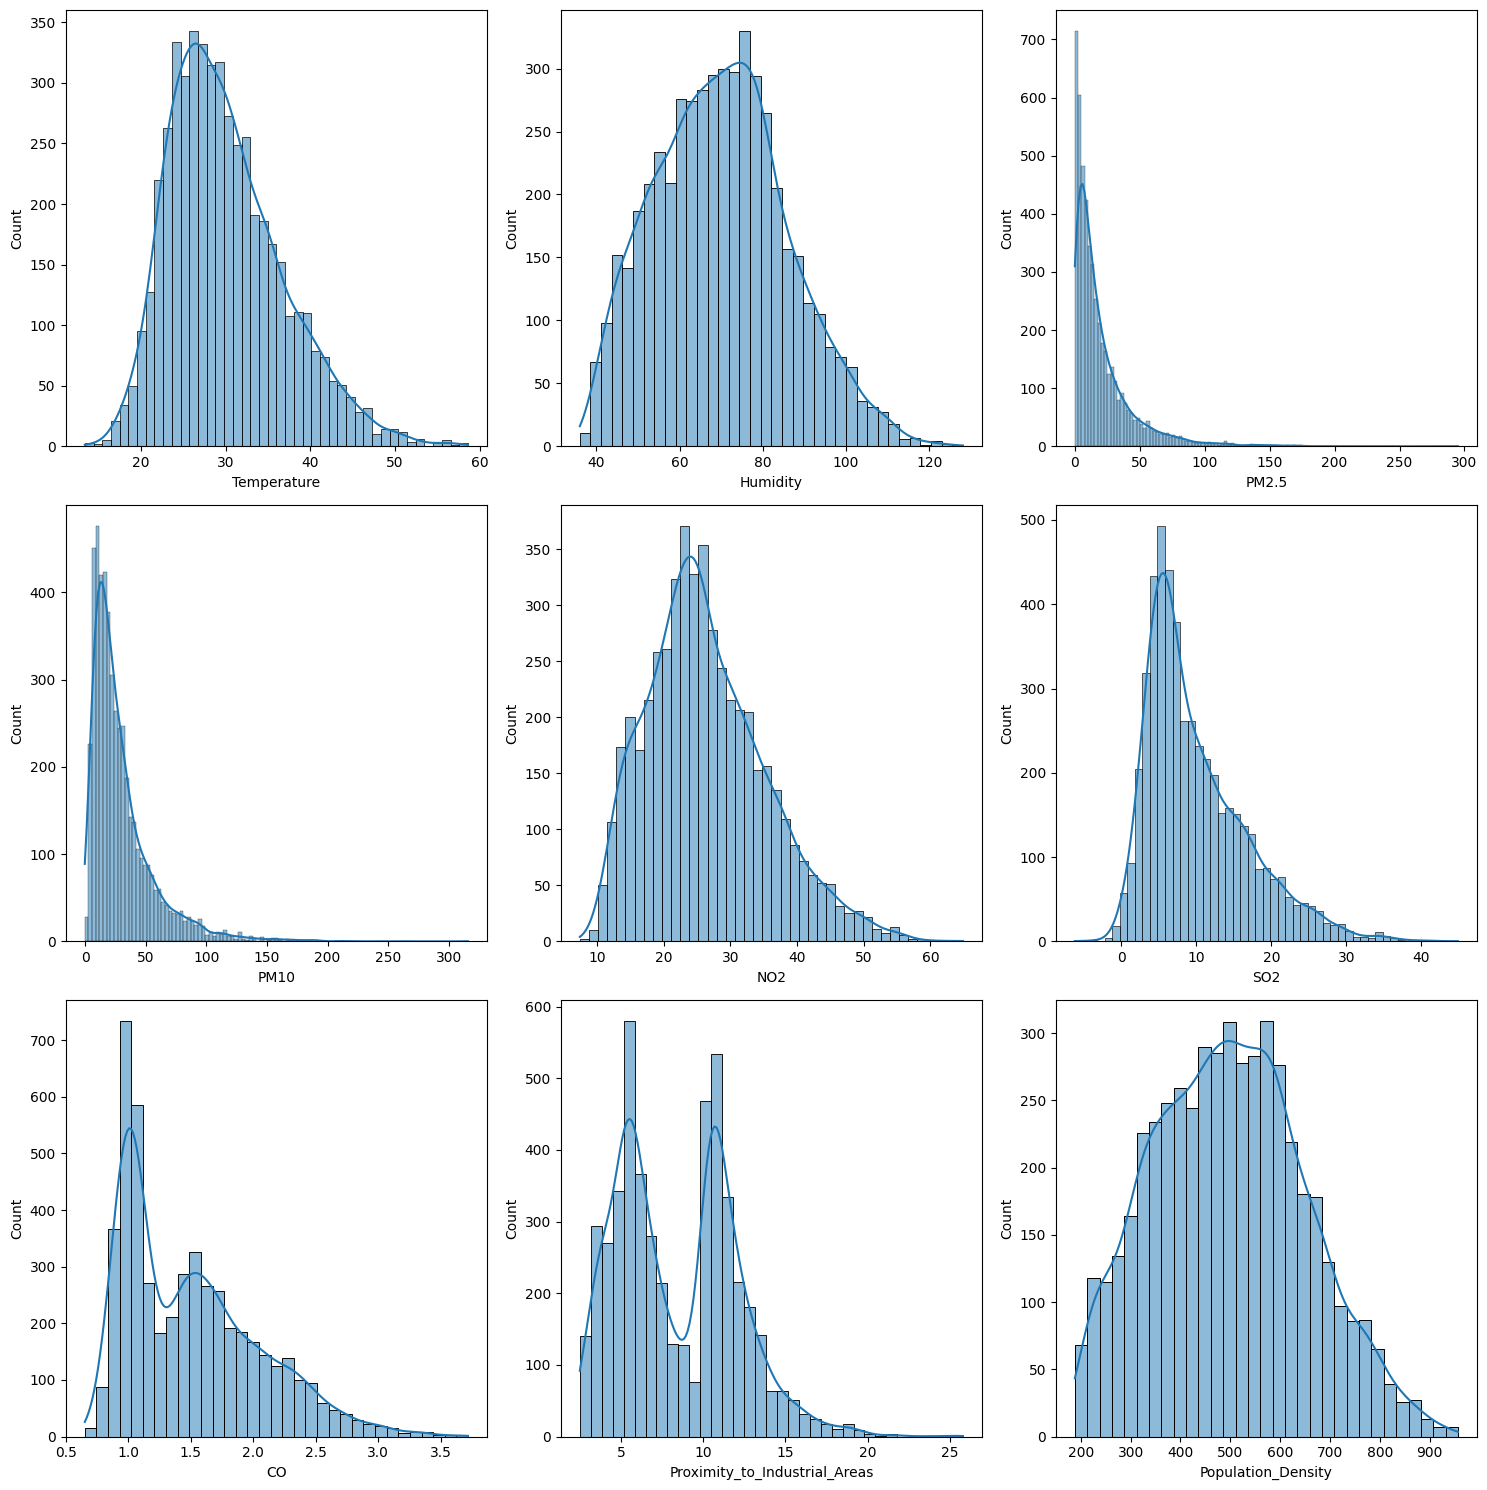

In [7]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
ax = ax.flatten()

i = 0
for col in X.columns :
    sns.histplot(data = X, x = col,  kde=True, ax=ax[i])
    i+=1
plt.tight_layout()

In [8]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [25]:
len(df[df["PM2.5"]<=20])/len(df["PM2.5"])

0.6714

In [20]:
def IQR(X):
    q05 = np.percentile(X, 5)
    q95 = np.percentile(X, 95)
    return round(q05, 2), round(q95, 2)
for col in X_columns:
    q05, q95 = IQR(df[col])
    print(col, "\n",
          "최빈값 :", df[col].mode()[0], "\n",
          "평균 :", df[col].mean().round(2), "\n",
          "중위값 :", df[col].median(), "\n",
          "왜도 :", df[col].skew().round(2))
    print("범위:", q05, "~", q95, "범위값:",round(q95-q05, 2))

Temperature 
 최빈값 : 26.8 
 평균 : 30.03 
 중위값 : 29.0 
 왜도 : 0.75
범위: 21.0 ~ 42.6 범위값: 21.6
Humidity 
 최빈값 : 73.0 
 평균 : 70.06 
 중위값 : 69.8 
 왜도 : 0.28
범위: 45.1 ~ 97.91 범위값: 52.81
PM2.5 
 최빈값 : 1.5 
 평균 : 20.14 
 중위값 : 12.0 
 왜도 : 2.89
범위: 0.8 ~ 68.4 범위값: 67.6
PM10 
 최빈값 : 8.1 
 평균 : 30.22 
 중위값 : 21.7 
 왜도 : 2.53
범위: 5.8 ~ 84.71 범위값: 78.91
NO2 
 최빈값 : 24.2 
 평균 : 26.41 
 중위값 : 25.3 
 왜도 : 0.64
범위: 13.6 ~ 43.1 범위값: 29.5
SO2 
 최빈값 : 5.7 
 평균 : 10.01 
 중위값 : 8.0 
 왜도 : 1.17
범위: 2.3 ~ 23.6 범위값: 21.3
CO 
 최빈값 : 0.98 
 평균 : 1.5 
 중위값 : 1.41 
 왜도 : 0.88
범위: 0.88 ~ 2.53 범위값: 1.65
Proximity_to_Industrial_Areas 
 최빈값 : 5.1 
 평균 : 8.43 
 중위값 : 7.9 
 왜도 : 0.47
범위: 3.5 ~ 14.4 범위값: 10.9
Population_Density 
 최빈값 : 494 
 평균 : 497.42 
 중위값 : 494.0 
 왜도 : 0.2
범위: 249.0 ~ 765.0 범위값: 516.0


#### Key Features:

- Temperature (°C) - 평균기온: Average temperature of the region.   
    - 왼쪽으로 치우친 분포(양의왜도 0.75, 최빈값 < 중앙값 < 평균값)
    - 90%가 21~42 사이에 분포, 평균 30
- Humidity (%) - 습도: Relative humidity recorded in the region.   
    - 왼쪽으로 치우친 분포(양의왜도 0.28, 중앙값 < 평균값 < 최빈값)
- PM2.5 Concentration (µg/m³) - 초미세먼지: Fine particulate matter levels.   
    - 왼쪽으로 치우친 분포(양의왜도 2.89, 최빈값 < 중앙값 < 평균값)
    - 최빈값은 1.5로 평균, 중위수보다 의미있는 값, 100이상의 극단적인 값이 존재
- PM10 Concentration (µg/m³) - 미세먼지: Coarse particulate matter levels.
    - 왼쪽으로 치우친 분포(양의왜도 2.53, 최빈값 < 중앙값 < 평균값)
    - 최빈값은 8.1로 평균, 중위수보다 의미있는 값, 100이상의 극단적인 값이 존재
    - 최솟값이 음수(-)로 이상치가 존재함
- NO2 Concentration (ppb) - 이산화질소: Nitrogen dioxide levels.   
    - 왼쪽으로 치우친 분포(양의왜도 0.64, 최빈값 < 중앙값 < 평균값)
- SO2 Concentration (ppb) - 이산화황: Sulfur dioxide levels.   
    - 왼쪽으로 치우친 분포(양의왜도 1.17, 최빈값 < 중앙값 < 평균값)
    - 최솟값이 음수(-)로 이상치가 존재함
- CO Concentration (ppm) - 일산화탄소: Carbon monoxide levels.   
    - 봉우리가 두개인(0.98, 1.5_) 왼쪽으로 치우친 분포(양의왜도 0.88, 최빈값 < 중앙값 < 평균값)
- Proximity to Industrial Areas (km) - 산업단지 근접도: Distance to the nearest - industrial zone.   
    - 봉우리가 두개인 분포
    - 거리의 분포는 target변수에 직접적인 원인이 되는 것은 아님
- Population Density (people/km²) - 인구밀도: Number of people per square 
    - 정규분포에 가까운 형태

In [29]:
df["Air Quality_Num"] = df["Air Quality"].map({'Good':0, 'Moderate':1, 'Poor':2, 'Hazardous':3})

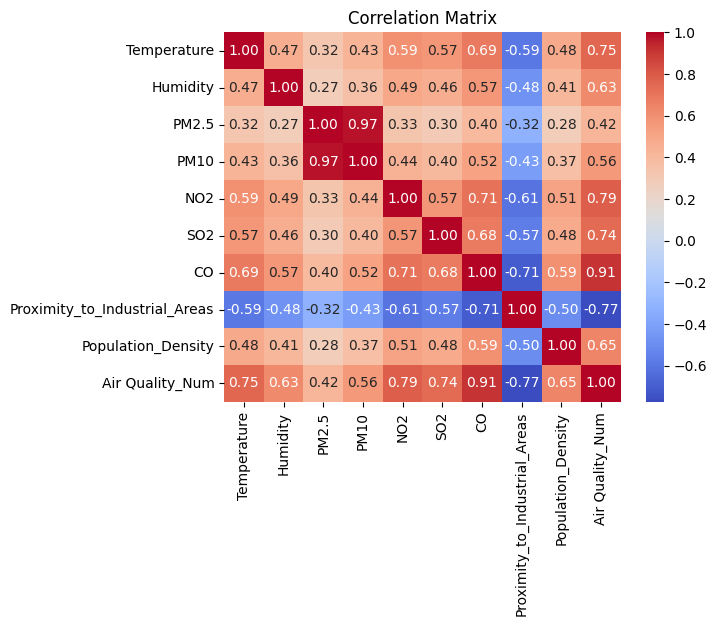

,Air Quality_Num
Air Quality_Num,1.00
CO,0.91
NO2,0.79
Proximity_to_Industrial_Areas,0.77
Temperature,0.75
SO2,0.74
Population_Density,0.65
Humidity,0.63
PM10,0.56
PM2.5,0.42


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵
corr_matrix = df.drop("Air Quality", axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
corr_matrix[["Air Quality_Num"]].round(2).abs().sort_values(by="Air Quality_Num", ascending=False)